# Imports

In [1]:
%matplotlib inline
import sys, os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

sys.path.insert(0,os.path.abspath('..'))
from Scripts.methodChain import *

plt.rc("axes.spines", top=False, right=False)

# Cleaning up data
We have created a script called methodChain that contains chained methods load_and_processText() as well as load_and_processSlang() which gets rid of uneccessary columns in our datasets. The cleaned up datasets are then loaded into df - list of text inputs - and dfSlang - list of abbreviations and the corresponding keys.

In [2]:
df = load_and_processText()
dfSlang = load_and_processSlang()

In [3]:
 data_dict = dfSlang.set_index('Column1')['Column2'].to_dict()

# Implementation of pseudocode
We've created a function called implementation which takes a text input, finds all abbreviations and replace them with the corresponding key.

In [4]:
def implementation(tweet):
    found = 0
    tweet.lower()
    words = tweet.split()
    tweetFinal = ""
    iterator = 0
    for i in words:
        
        # Has a period
        if(i[len(i)-1] == '.'):   
            i = i[0:(len(i)-1)]
            if(data_dict.get(i) != None):
                words[iterator] = (data_dict.get(i) + ".")
            
        #Does not have a period
        elif(data_dict.get(i) != None):
            words[iterator] = data_dict.get(i)
        iterator+=1
        
    for j in words:
        tweetFinal += (j + " ")
    return tweetFinal

# Test case and output
Here is a sample text input with some abbreviations that we've tested with our implementation function.

In [5]:
sample = "we're still meeting at 8pm afaik. if anything changes i'll send you the deets. cu l8r and tc."
implementation(sample)


"we're still meeting at 8pm as far as I know. if anything changes i'll send you the details. see you later and take care. "

In [6]:
sample2 = "i think we r lost, this is not the wtg"
implementation(sample2)


'i think we are lost, this is not the way to go '

In [7]:
sample3 = "thx for coming to my b-day 2nite, will 4ward the pics to u"
implementation(sample3)

'thanks for coming to my birthday 2nite, will forward the pics to you '

# Plots of different input sizes


In [8]:
from tryItABunch import tryItABunch
nValuesNaive, tValuesNaive = tryItABunch(implementation, startN = 148, endN = 20000, stepSize=74, numTrials=5)

Text(0.5, 1.0, 'Original Naive algorithm')

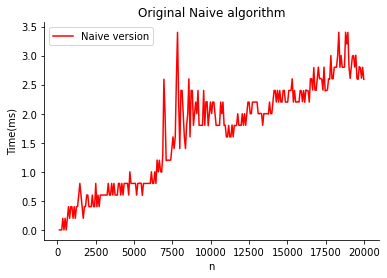

In [9]:
plt.plot(nValuesNaive, tValuesNaive,color="red", label="Naive version")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Original Naive algorithm")

In [10]:
from tryItABunch3 import tryItABunch3
nValuesNaive2, tValuesNaive2 = tryItABunch3(numTrials=5)

Text(0.5, 1.0, 'Better algorithm verus O(m+n+n)')

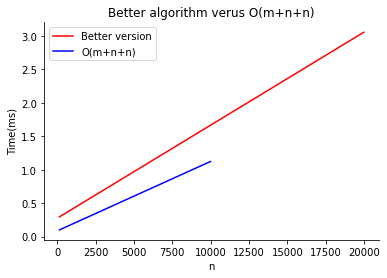

In [11]:
m, b = np.polyfit(nValuesNaive, tValuesNaive, 1)
nValuesBetterNP = np.array(nValuesNaive)

m2, b2 = np.polyfit(nValuesNaive2, tValuesNaive2, 1)
nValuesONP = np.array(nValuesNaive2)

plt.plot(nValuesNaive, m* nValuesBetterNP+ b,color="red", label="Better version")

plt.plot(nValuesNaive2, m2* nValuesONP+ b2,color="blue", label="O(m+n+n)")

plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Better algorithm verus O(m+n+n)")

# Ask TA
- Changing O notation for imple (if we can change m+n+n to m+n)
- Weird Naive algo graph (it looks bad and linear)
- Changing naive algo (if we can make it not linear)